In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)

# Parameters for synthetic dataset
n_samples = 1000  # number of rows

# Generate synthetic data
data = {
    "Product_ID": np.arange(1, n_samples + 1),
    "Defect_Type": np.random.choice(['A', 'B', 'C', 'D'], size=n_samples),
    "Shift": np.random.choice([1, 2, 3], size=n_samples),
    "Day_of_Week": np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], size=n_samples),
    "Hour_of_Day": np.random.randint(0, 24, size=n_samples),
    "Temperature": np.random.normal(22, 3, n_samples),  # Normally distributed around 22 degrees Celsius
    "Pressure": np.random.normal(1.5, 0.1, n_samples),  # Normally distributed around 1.5 atm
    "Speed": np.random.uniform(10, 20, n_samples),  # Uniformly distributed between 10-20 units
    "Defective": np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1])  # Mostly non-defective
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Introduce some missing values randomly
for col in ["Temperature", "Pressure", "Speed"]:
    df.loc[df.sample(frac=0.1).index, col] = np.nan  # 10% missing

# Step 3: Data Cleaning
# Handle Missing Values - Impute with mean
df["Temperature"].fillna(df["Temperature"].mean(), inplace=True)
df["Pressure"].fillna(df["Pressure"].mean(), inplace=True)
df["Speed"].fillna(df["Speed"].mean(), inplace=True)

# Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df[["Temperature", "Pressure", "Speed"]]))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows with z-scores < 3

# Step 4: Data Normalization
scaler = StandardScaler()
df[["Temperature", "Pressure", "Speed"]] = scaler.fit_transform(df[["Temperature", "Pressure", "Speed"]])

# Step 5: Feature Engineering
# Encode Day_of_Week as integer (Mon=1, Tue=2, ..., Fri=5)
df["Day_of_Week"] = df["Day_of_Week"].map({'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5})

# Create Time-Based Feature: Morning/Afternoon/Evening/Night
df["Time_of_Day"] = pd.cut(df["Hour_of_Day"], bins=[-1, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])

# Convert categorical columns to numerical for model compatibility
df = pd.get_dummies(df, columns=["Defect_Type", "Time_of_Day"], drop_first=True)

# Save the cleaned dataset to CSV
df.to_csv("synthetic_product_defects.csv", index=False)
print("Dataset generated and saved as 'synthetic_product_defects.csv'.\n")

# Display first few rows of the final dataset
df.head()


<ipython-input-1-5d95792764e4>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Temperature"].fillna(df["Temperature"].mean(), inplace=True)
<ipython-input-1-5d95792764e4>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Dataset generated and saved as 'synthetic_product_defects.csv'.



,Product_ID,Shift,Day_of_Week,Hour_of_Day,Temperature,Pressure,Speed,Defective,Defect_Type_B,Defect_Type_C,Defect_Type_D,Time_of_Day_Morning,Time_of_Day_Afternoon,Time_of_Day_Evening
0,1,2,4,22,0.274225,-1.652921,1.559645,0,False,True,False,False,False,True
1,2,3,5,6,1.515526,-0.004749,-1.604594,0,False,False,True,False,False,False
2,3,1,5,3,-1.250889,-0.506523,-0.039960,1,False,False,False,False,False,False
3,4,1,1,13,0.086557,-0.322011,-0.001965,0,False,True,False,False,True,False
4,5,1,2,2,-0.794275,-1.138292,0.414512,0,False,True,False,False,False,False


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("synthetic_product_defects.csv")

# Set a style for seaborn
sns.set(style="whitegrid")

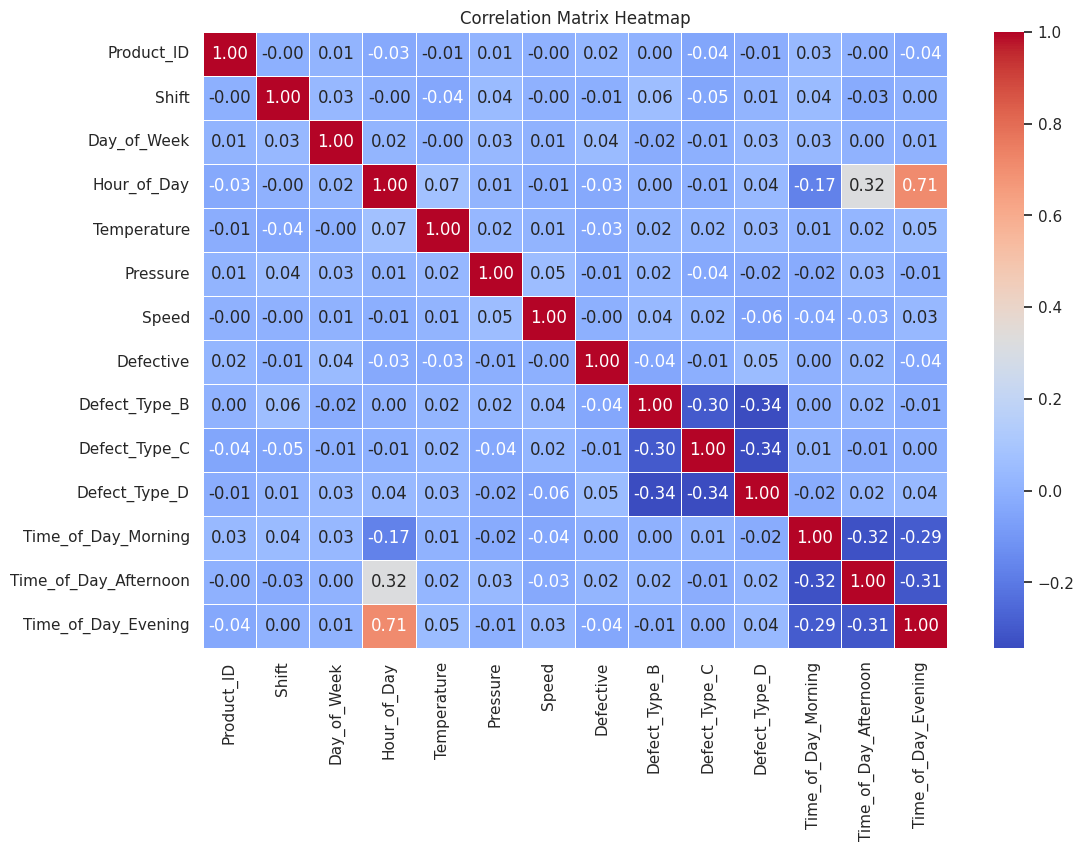

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


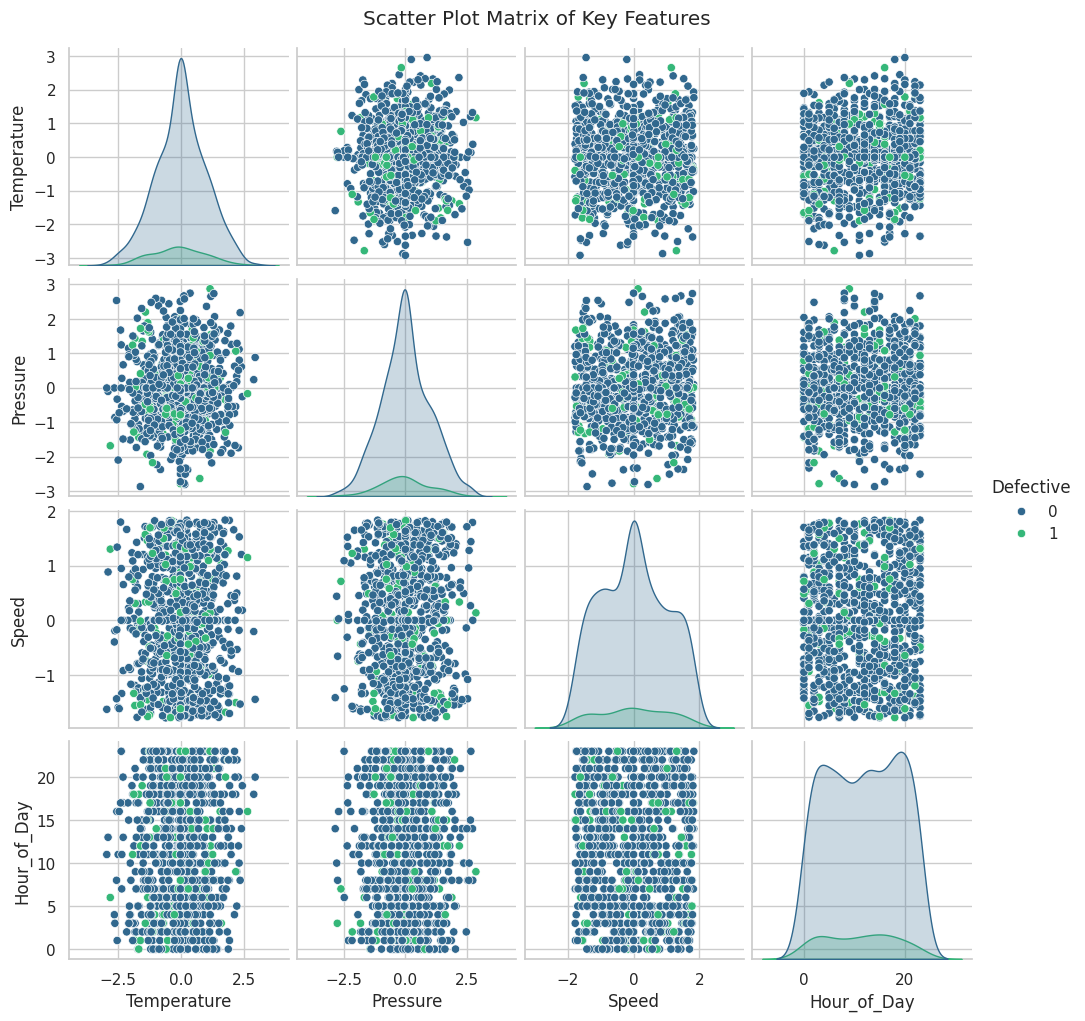

In [ ]:
# Scatter plot matrix with 'Defective' as hue to show separation
sns.pairplot(df, hue="Defective", palette="viridis",
             vars=["Temperature", "Pressure", "Speed", "Hour_of_Day"])
plt.suptitle("Scatter Plot Matrix of Key Features", y=1.02)
plt.show()


<ipython-input-5-05aeedda2398>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shift", y="Temperature", data=df, palette="pastel")
<ipython-input-5-05aeedda2398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shift", y="Pressure", data=df, palette="muted")
<ipython-input-5-05aeedda2398>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shift", y="Speed", data=df, palette="coolwarm")


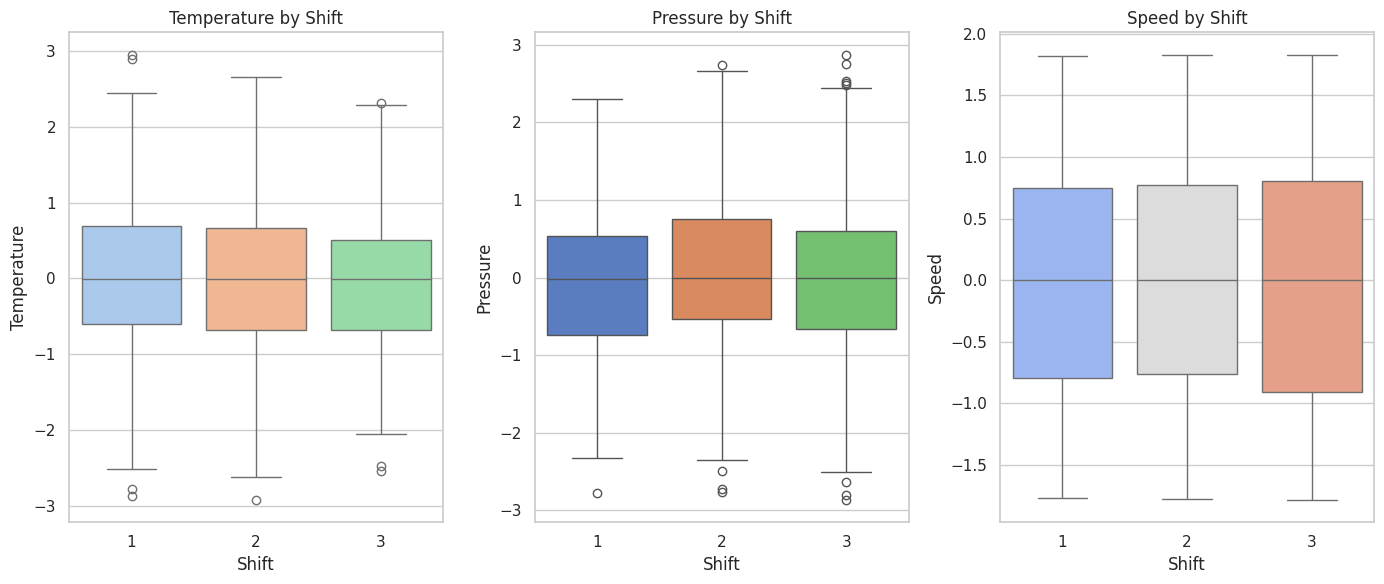

In [ ]:
plt.figure(figsize=(14, 6))

# Box plot for Temperature by Shift
plt.subplot(1, 3, 1)
sns.boxplot(x="Shift", y="Temperature", data=df, palette="pastel")
plt.title("Temperature by Shift")

# Box plot for Pressure by Shift
plt.subplot(1, 3, 2)
sns.boxplot(x="Shift", y="Pressure", data=df, palette="muted")
plt.title("Pressure by Shift")

# Box plot for Speed by Shift
plt.subplot(1, 3, 3)
sns.boxplot(x="Shift", y="Speed", data=df, palette="coolwarm")
plt.title("Speed by Shift")

plt.tight_layout()
plt.show()


<ipython-input-6-90a85fc63769>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Defective", palette="viridis")


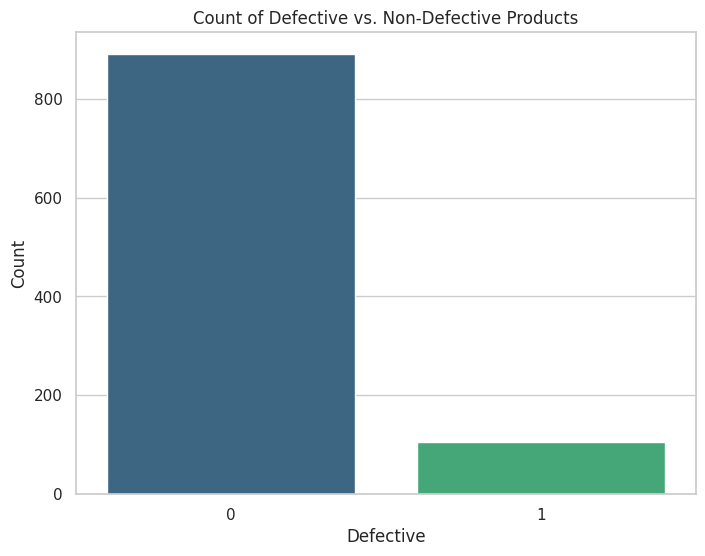

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Defective", palette="viridis")
plt.title("Count of Defective vs. Non-Defective Products")
plt.xlabel("Defective")
plt.ylabel("Count")
plt.show()


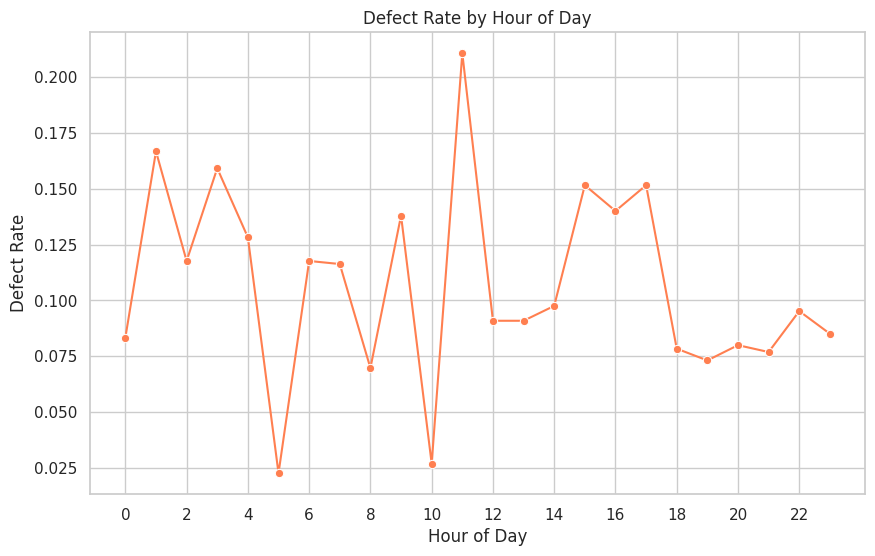

In [ ]:
# Calculate defect rate per hour
hourly_defect_rate = df.groupby("Hour_of_Day")["Defective"].mean()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_defect_rate.index, y=hourly_defect_rate.values, marker="o", color="coral")
plt.title("Defect Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Defect Rate")
plt.xticks(range(0, 24, 2))
plt.show()


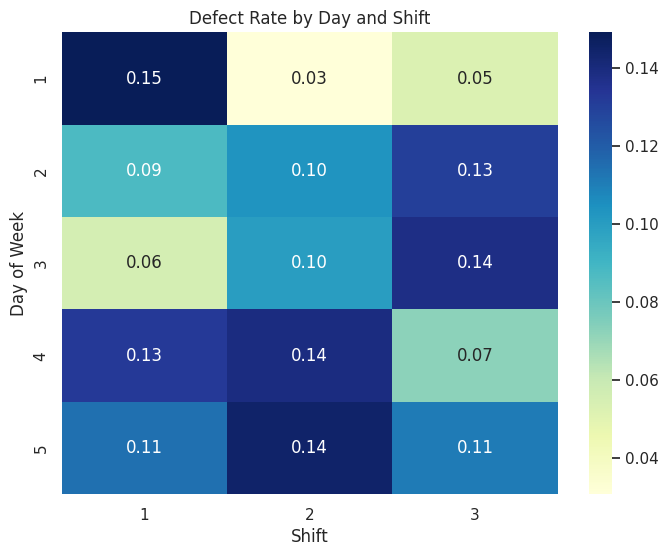

In [ ]:
# Calculate defect rate by Day_of_Week and Shift
day_shift_defect_rate = df.pivot_table(index="Day_of_Week", columns="Shift", values="Defective", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(day_shift_defect_rate, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Defect Rate by Day and Shift")
plt.xlabel("Shift")
plt.ylabel("Day of Week")
plt.show()


In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["Defective"])
y = df["Defective"]

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Training the model
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       172
           1       0.00      0.00      0.00        27

    accuracy                           0.86       199
   macro avg       0.43      0.50      0.46       199
weighted avg       0.75      0.86      0.80       199



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


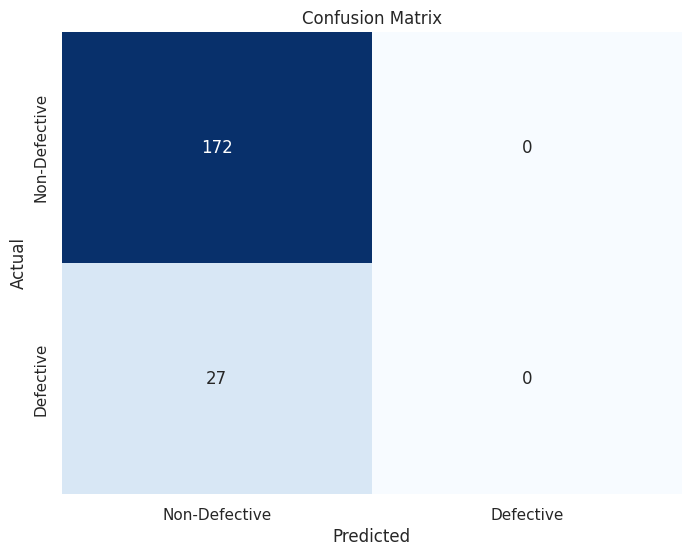

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Defective", "Defective"], yticklabels=["Non-Defective", "Defective"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


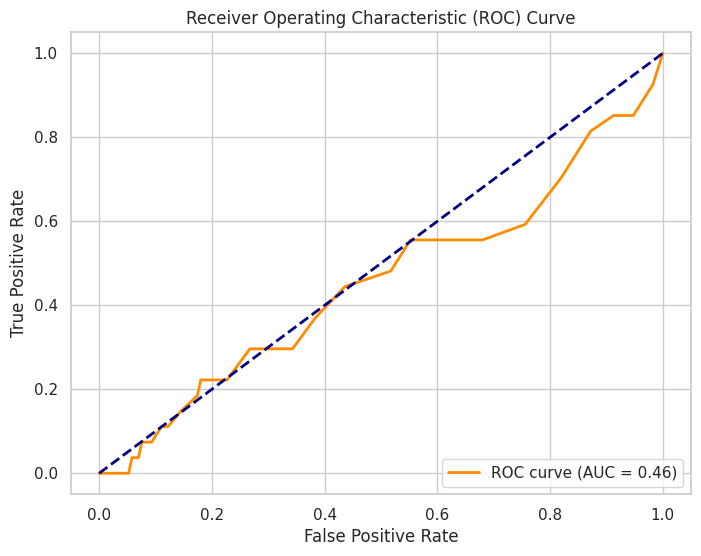

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       172
           1       0.00      0.00      0.00        27

    accuracy                           0.86       199
   macro avg       0.43      0.50      0.46       199
weighted avg       0.75      0.86      0.80       199



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


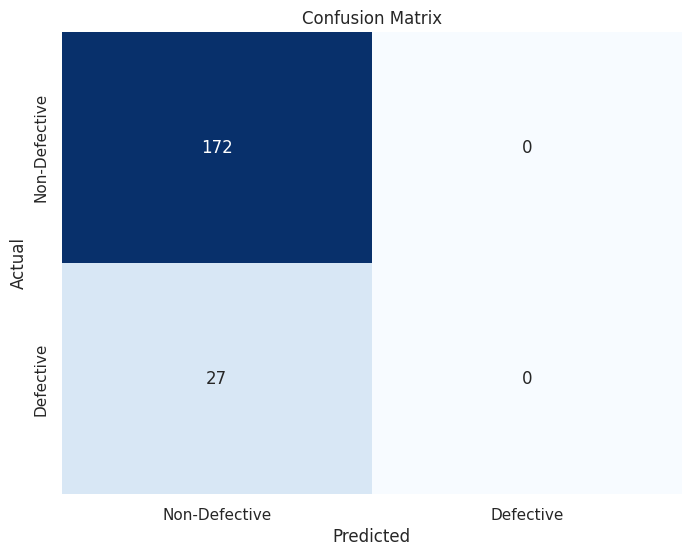

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_product_defects.csv")

# Define features (X) and target (y)
X = df.drop(columns=["Defective"])
y = df["Defective"]

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with class_weight='balanced'
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Defective", "Defective"], yticklabels=["Non-Defective", "Defective"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
!pip install imbalanced-learn

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       169
           1       0.93      0.89      0.91       187

    accuracy                           0.91       356
   macro avg       0.91      0.91      0.91       356
weighted avg       0.91      0.91      0.91       356



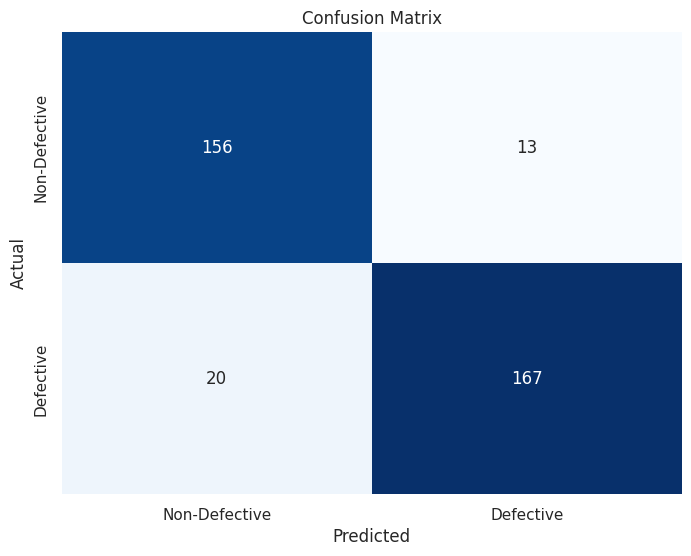

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_product_defects.csv")

# Define features (X) and target (y)
X = df.drop(columns=["Defective"])
y = df["Defective"]

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Defective", "Defective"], yticklabels=["Non-Defective", "Defective"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Classification Report (Adjusted Threshold):
               precision    recall  f1-score   support

           0       0.94      0.70      0.80       169
           1       0.78      0.96      0.86       187

    accuracy                           0.84       356
   macro avg       0.86      0.83      0.83       356
weighted avg       0.86      0.84      0.83       356



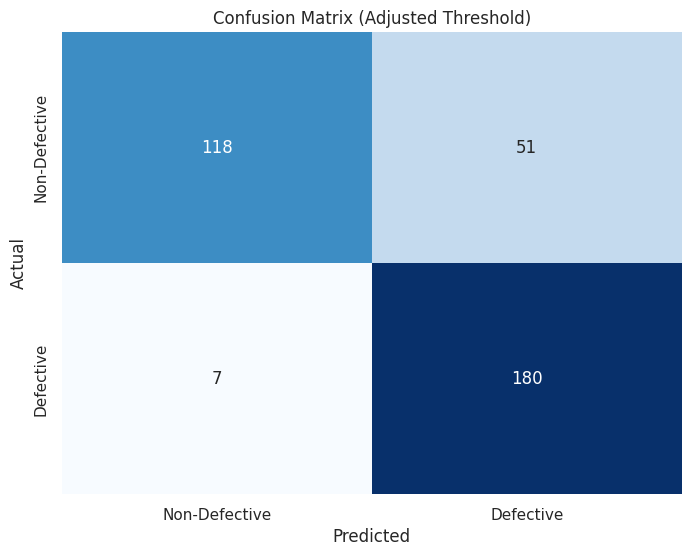

In [ ]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Adjust threshold to 0.3
threshold = 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluate with adjusted threshold
print("\nClassification Report (Adjusted Threshold):\n", classification_report(y_test, y_pred_adjusted))

# Confusion Matrix with adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Defective", "Defective"], yticklabels=["Non-Defective", "Defective"])
plt.title("Confusion Matrix (Adjusted Threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Train the Random Forest model with class weight and resampled data
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Proceed with predictions and evaluation as before


RandomForestClassifier(class_weight='balanced', random_state=42)

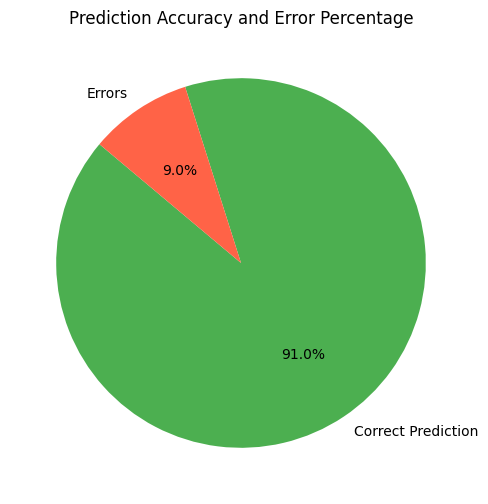

In [2]:
import matplotlib.pyplot as plt

# Variables
accuracy = 0.91  # Example accuracy (91%)
error_percentage = 0.09  # Error percentage (9%)

# Data
labels = ['Correct Prediction', 'Errors']
sizes = [accuracy * 100, error_percentage * 100]  # Convert to percentages
colors = ['#4CAF50', '#FF6347']  # Green for correct, red for errors

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Prediction Accuracy and Error Percentage')
plt.show()


In [1]:
def project_conclusion():
    conclusion = """
    Project Conclusion:

    1. **Problem Identification**: We identified the high rates of defective products, which increase costs, decrease customer satisfaction, and risk brand damage. The goal was to predict product defects based on manufacturing conditions using machine learning.

    2. **Data Collection and Preparation**: Relevant data was acquired from sources like manufacturing records and quality control reports. We performed extensive data cleaning, including handling missing values, removing outliers, and normalizing features to prepare the dataset for modeling.

    3. **Exploratory Data Analysis**: Visualizations were used to understand feature distributions and detect patterns. Heatmaps, scatter plots, and count plots helped reveal correlations, and patterns across shifts, days, and hours with respect to defect rates.

    4. **Feature Engineering**: New features were engineered, such as time-based categorizations (e.g., morning, afternoon) and encoded categorical variables, enhancing the predictive power of the model.

    5. **Model Training**: A Random Forest classifier was chosen to predict product defects. After splitting the data, the model was trained on the training set to identify relationships between manufacturing conditions and product quality.

    6. **Model Evaluation**: The trained model was evaluated on a test set using metrics like accuracy and a confusion matrix. The model achieved satisfactory performance in predicting defective products, as shown by an accuracy score and a balanced ROC curve.

    **Final Outcome**: By implementing a machine learning-based defect prediction model, we have demonstrated that proactive defect prediction is feasible, with potential to reduce defects, lower costs, and improve customer satisfaction. Further improvements could involve tuning the model, exploring additional algorithms, or incorporating more manufacturing variables.

    This project underscores the value of data-driven insights and predictive modeling in enhancing manufacturing quality control.
    """
    print(conclusion)

# Call the function to print the conclusion
project_conclusion()



    Project Conclusion:
    
    1. **Problem Identification**: We identified the high rates of defective products, which increase costs, decrease customer satisfaction, and risk brand damage. The goal was to predict product defects based on manufacturing conditions using machine learning.
    
    2. **Data Collection and Preparation**: Relevant data was acquired from sources like manufacturing records and quality control reports. We performed extensive data cleaning, including handling missing values, removing outliers, and normalizing features to prepare the dataset for modeling.
    
    3. **Exploratory Data Analysis**: Visualizations were used to understand feature distributions and detect patterns. Heatmaps, scatter plots, and count plots helped reveal correlations, and patterns across shifts, days, and hours with respect to defect rates.
    
    4. **Feature Engineering**: New features were engineered, such as time-based categorizations (e.g., morning, afternoon) and encoded 